## Základné nastavenia

Pri analýze dát budeme používať viacero knižníc, ktoré je na začiatku potrebné naimportovať do Vášho zápisníka. Knižnica `numpy` poskytuje základné typy, ako sú napr. dátové polia reprezentujúce numerické vektory hodnôt, alebo matice. Pri analýze dát budeme najčastejšie pracovať s knižnicou `pandas`, ktorá rozširuje `numpy` a definuje základné typy pre reprezentáciu dátových tabuliek a ich stĺpcov. Knižnice `mathplotlib` a `seaborn` budeme používať na vykresľovanie grafov, ktoré sa zobrazia priamo ako súčasť zápisníka.

In [25]:
# importujeme potrebné knižnice, tento odstavec by mal byť spustený ako prvý predtým ako sa budú používať
# importované objekty pd, np, plt a sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nastavíme zobrazovanie grafov priamo v odstavcoch zápisníka
%matplotlib inline
# inicializujeme knižnicu seaborn
sns.set()

## Dátová množina - Správa o šťastí sveta

Správu o šťastí sveta vydáva každoročne organizácia spojených národov a je založená na dátach dotazníkového prieskumu, ktoré sú zozbierané z reprezentatívnej vzorky obyvateľov jednotlivých krajín. Dotazníkový prieskum sa zameriava na hodnotenie vlastného života na základe viacerých kritérií, ktoré zahŕňajú ekonomické ukazovatele, sociálnu starostlivosť, zdravotníctvo, slobodu rozhodovania, vnímanie dobrosrdečnosti medzi ľuďmi a vnímanie korupcie.

![World Happiness Record](whr-2017-happy.jpg)
[Zdroj](http://unsdsn.org/news/2017/03/20/fifth-world-happiness-report-2017-ranks-happiest-countries/)

Dáta ktoré máte k dispozícii sú vyhodnotené za roky 2015, 2016 a 2017 a sú popísané nasledujúcimi atribútmi:

* `Country` - Názov krajiny
* `Region` - Geopolitický región krajiny
* `Rank` - Celkové umiestnenie v rebríčku krajín za daný rok, podľa dosiahnutého skóre
* `Score` - Dosiahnuté skóre vyjadrujúce celkové šťastie v krajine
* `GDP` - Ekonomická situácia - hrubý národný produkt na obyvateľa
* `Family` - Sociálna podpora rodiny
* `Health` - Stav zdravotníctva - očakávaná dĺžka života
* `Freedom` - Sloboda prejavuje a rozhodovania
* `Trust` - Vnímanie korupcie
* `Generosity` - Vnímanie dobrosrdečnosti

Do celkového hodnotenia je zahrnutý rozdiel medzi danou krajinou a _Distópiou_ - hypotetickou krajinou, ktorá má najnižšie hodnotenie pre všetky ukazovatele (tzn. žiadna krajina na tom nemôže byť horšie ako Distópia).

### Načítanie dát a základné štatistiky

Dátová tabuľka je v knižnici `pandas` reprezentovaná typom `DataFrame` (_dátový rámec_), ktorý je zložený z jednotlivých stĺpcov reprezentovaných typom `Series` (_dátová postupnosť_). `pandas` priamo podporuje načítanie a zápis dát v štandardných formátoch ako napr. `.csv` (_Comma-Separated Values_ - textový formát s hodnotami oddelenými čiarkou).

In [2]:
# načítame dáta za rok 2015 zo súboru 2015.csv
data_2015 = pd.read_csv("../data/2015.csv")

# zobrazíme si názvy stĺpcov (vlasnosť columns je objekt typu pandas.Index, ktorý reprezentuje postupnosť indexov pre
# riadky, alebo stĺpce tabuľky, pristupuje sa k nemu podobne ako ku zoznamu)
data_2015.columns

Index(['Country', 'Region', 'Rank', 'Score', 'StdError', 'GDP', 'Family',
       'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia'],
      dtype='object')

K dátam sa pristupuje rovnako ako pri zoznamoch, alebo mapách indexovaním. Stĺpce sú štandardne indexované podľa ich názvu a hodnoty v stĺpcoch podľa číselného indexu riadku tabuľky (od 0). Pre každý číselný stĺpec môžeme priamo vypočítať základné štatistiky, ako napr. počet neprázdnych hodnôt, minimum, maximum, priemer, štandardnú odchýlku a kvantily.

In [3]:
# rozmer dátovej tabuľky zistíme z vlastnosti shape
print(data_2015.shape[0]) # prvý rozmer - počet riadkov
print(data_2015.shape[1]) # druhý rozmer - počet stĺpcov

# k dátam pristupujeme indexovaním, napr. vypíšeme hodnotu stĺpca 'Country' na prvom riadku tabuľky (index 0)
print(data_2015['Country'][0])

scores = data_2015['Score'] # scores je objekt typu pandas.Series, ktorý reprezentuje jeden stĺpec tabuľky

# pre číselné stĺpce môžeme vypočítať priamo základné štatistiky
score_count = scores.count()      # počet neprázdnych hodnôt
score_mean = scores.mean()        # priemerná hodnota
score_std = scores.std()          # štandardná odchýlka výberu
score_min = scores.min()          # minimálna hodnota
score_max = scores.max()          # maximálna hodnota
score_q25 = scores.quantile(0.25) # 25% kvartil
score_q50 = scores.quantile(0.5)  # 50% kvartil - medián
score_q75 = scores.quantile(0.75) # 75% kvartil

# štatistiky pre všetky číselné atribúty tabuľky môžeme vypočítať aj naraz pomocou metódy describe()
data_2015.describe()

158
12
Switzerland


,Rank,Score,StdError,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [4]:
# pre kategorické atribúty môžeme zobraziť zoznam rôznych hodnôt a ich početnosti
# napr. pre 'Region'
data_2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

### Príprava dát

Postupne načítame a upravíme dáta pre roky 2015, 2016 a 2017. Z tabuľky za rok 2015 odstránime stĺpec `StdError`, ktorý udáva štandardnú odchýlku odpovedí medzi obyvateľmi jedného štátu a ďalej ho nebudeme pri analýze používať.

In [5]:
# stĺpce sa odstráňujú pomocou metódy drop
# štandardne metóda drop nezmení pôvodný dátový rámec, ale vytvorí nový, takže si zmeníme premennu data_2015
# na novú hodnotu
data_2015 = data_2015.drop(columns="StdError")
# do tabuľky pridáme stĺpec 'Year', ktorého hodnotu nastavíme na 2015 pre všetky riadky
data_2015["Year"] = 2015
# pomocou metódy head si zobrazíme prvé riadky tabuľky (štandardne metóda head vracia nový objekt DataFrame s prvými
# 5 riadkami pôvodnej tabuľky)
data_2015.head()

,Country,Region,Rank,Score,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


Načítame dáta za rok 2016 z ktorých odstránime stĺpce `LowerConfidence` a `UpperConfidence` a pridáme stĺpec `Year` s hodnotou 2016 pre všetky riadky.

In [6]:
# načítame dáta za rok 2016
data_2016 = pd.read_csv("../data/2016.csv")
# ak v metóde drop nastavíme parameter inplace na True, stĺpec sa odstráni priamo v pôvodnom rámci a nevytvorí sa
# nový, ako parameter columns môžete naraz zadať zoznam viacerých stĺpcov, ktoré sa majú odstrániť
data_2016.drop(columns=["LowerConfidence", "UpperConfidence"], inplace=True)
# pridáme stĺpec Year
data_2016["Year"] = 2016

# pre výpis riadkov môžete pre metódu head zadať počet riadkov, ktoré sa majú zobraziť
data_2016.head(1) # vypíšeme 1 riadok

,Country,Region,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia,Year
0,Denmark,Western Europe,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016


Z výpisu si môžete všimnúť, že tabuľka za rok 2016 neobsahuje celkové skóre a poradie krajín (stĺpce `Score` a `Rank`). Keďže `Score` a `Rank` sú vypočítané spočítaním ostatných ukazovateľov, môžeme ich jednoducho dopočítať metódou `eval`. Pre metódu `eval` sa výraz pre výpočet hodnôt zadáva ako reťazec, ktorý môže obsahovať názvy existujúcich stĺpcov, konštanty (čísla, reťazce a pod.) a operátory `+`, `-`, `*`, `/`, `**`, `%`.

In [7]:
# pridáme do tabuľky nový stĺpec Score, ktorého hodnotu pre každý riadok vypočítame ako súčet atribútov GDP, Family,
# Health, Freedom, Trust, Generosity a Dystopia
data_2016["Score"] = data_2016.eval("GDP + Family + Health + Freedom + Trust + Generosity + Dystopia")

# stĺpec Rank sa určuje podľa celkového poradia krajín zoradených podľa skóre od najväčšieho po najmenšie
# zoradíme si riadky tabuľky podľa skóre v zostupnom poradí
data_2016.sort_values(by="Score", ascending=False)
# pre kontrolu si zobrazíme 3 prvé a 3 posledné krajiny
data_2016.head(3)

,Country,Region,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia,Year,Score
0,Denmark,Western Europe,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016,7.52560
1,Switzerland,Western Europe,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016,7.50866
2,Iceland,Western Europe,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,7.50139


In [8]:
# metóda tail vracia posledné riadky tabuľky
data_2016.tail(3)

,Country,Region,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia,Year,Score
154,Togo,Sub-Saharan Africa,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016,3.30256
155,Syria,Middle East and Northern Africa,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016,3.06910
156,Burundi,Sub-Saharan Africa,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404,2016,2.90453


In [8]:
# keďže dáta máme zoradené zostupne podľa celkového skóre, hodnoty v stĺpci poradia Rank nastavíme na 
# postupnosť čísel 1, 2, ..., počet krajín (počet riadkov v tabuľke)
data_2016["Rank"] = range(1, data_2016.shape[0] + 1)
data_2016.head()

,Country,Region,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia,Year,Score,Rank
0,Denmark,Western Europe,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016,7.52560,1
1,Switzerland,Western Europe,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016,7.50866,2
2,Iceland,Western Europe,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,7.50139,3
3,Norway,Western Europe,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016,7.49758,4
4,Finland,Western Europe,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016,7.41349,5


### Úloha 7.1

1. Do premennej `data_2017` načítajte dáta za rok 2017 zo súboru `2017.csv`.
2. Odstráňte nepotrebné stĺpce `WhiskerHigh` a `WhiskerLow`.
3. Pridajte stĺpec `Year` a nastavte jeho hodnotu na 2017 pre všetky riadky.
4. Zobrazte prvý riadok tabuľky.

In [9]:
data_2017 = None
data_2017 = pd.read_csv("../data/2017.csv")
data_2017.drop(columns=["WhiskerHigh", "WhiskerLow"], inplace=True)
data_2017["Year"] = 2017
data_2017.head(1)

,Country,Region,Rank,Score,GDP,Family,Health,Freedom,Generosity,Trust,Dystopia,Year
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017


In [10]:
# pomocou metódy concat si spojíme dáta za všetky roky do jednej tabuľky, parameter sort=False a ignore_index=True
# udáva, že sa riadky nemajú preusporiadať podľa ich pôvodných indexov a že sa zachová poradanie v akom sú uvedené
# spájané tabuľky (tzn. najprv všetky riadky 2015, potom 2016 a na koniec 2017)
data = pd.concat([data_2015, data_2016, data_2017], ignore_index=True, sort=False)
data.head(1)

,Country,Region,Rank,Score,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015


### Výber dát

Z tabuľky je možné vybrať iba niektoré stĺpce podľa názvu, alebo riadky podľa zadanej podmienky. Pre výber riadkov môžete použiť metódu `query` pri ktorej sa logická podmienka zadáva jednoducho ako reťazec podobne ako pri zadávaní výrazov v metóde `eval`.

In [12]:
# vyberieme iba stĺpce Contry, Rank, Score a Year
selected = data[["Country", "Rank", "Score", "Year"]]

# vyberieme iba riadky o Slovensku
selected.query("Country == 'Slovakia'")

,Country,Rank,Score,Year
44,Slovakia,45,5.99500,2015
202,Slovakia,45,6.07848,2016
354,Slovakia,40,6.09800,2017


In [13]:
# pri filtrovaní riadkov môžete zadať zložitejšiu podmienku s operátormi <, >, <=, >=, !=, ==, in [zoznam],
# not in [zoznam] a s logickými spojkami and, or a not

# napr. odfitrujeme riadky o našich susedoch za rok 2017 a výsledok usporiadame podľa celkového poradia krajín
q = "Country in ['Slovakia', 'Czech Republic', 'Poland', 'Hungary', 'Ukraine', 'Austria'] and Year == 2017"
selected.query(q).sort_values(by="Rank")

,Country,Rank,Score,Year
327,Austria,13,7.006,2017
337,Czech Republic,23,6.609,2017
354,Slovakia,40,6.098,2017
360,Poland,46,5.973,2017
389,Hungary,75,5.324,2017
446,Ukraine,132,4.096,2017


## Závislosti medzi atribútmi

Jednou zo základných úloh vo fáze pochopenia dát je analyzovať závislosti medzi dvojicami atribútov.

### Závislosti medzi kategorickými a číselnými atribútmi

Závislosti medzi kategorickými a číselnými atribútmi môžeme skúmať napr. pomocou _kontingenčnej tabuľky_, ktorá rozdelí dáta do skupín podľa hodnôt kategorických atribútov a zosumarizuje pre každú skupinu hodnoty číselných atribútov pomocou rôznych agregačných funkcií (napr. priemerná/minimálna/maximálne hodnota, štandardná odchýlka výberu atď.)

Kontingenčnú tabuľku vytvoríme pomocou metódy `pivot_table`, kde musíme okrem dát zadať aspoň jeden kategorický atribút a jeden číselný.

In [14]:
# napr. na výpočet priemerného skóre pre všetky krajiny v danom roku môžeme zadať
pd.pivot_table(data, index="Year", values="Score")

,Score
Year,
2015,5.375734
2016,5.382179
2017,5.354019


In [15]:
# dáta môžeme zoskupiť podľa viacerých kategorických atribútov naraz,
# napr. podľa regiónu a roku
pd.pivot_table(data, index=["Region", "Year"], values="Score")

Score
Region                          Year          
Australia and New Zealand       2015  7.285000
                                2016  7.323545
                                2017  7.299000
Central and Eastern Europe      2015  5.332931
                                2016  5.370704
                                2017  5.409931
Eastern Asia                    2015  5.626167
                                2016  5.624293
                                2017  5.646667
Latin America and Caribbean     2015  6.144682
                                2016  6.101714
                                2017  5.957818
Middle East and Northern Africa 2015  5.406900
                                2016  5.386126
                                2017  5.369684
North America                   2015  7.273000
                                2016  7.253855
                                2017  7.154500
Southeastern Asia               2015  5.317444
                                2016  5.338793
                                2017  5.444875
Southern Asia                   2015  4.580857
                                2016  4.563343
                                2017  4.628429
Sub-Saharan Africa              2015  4.202800
                                2016  4.136360
                                2017  4.111949
Western Europe                  2015  6.689619
                                2016  6.685684
                                2017  6.703714

In [16]:
# kontingenčnú tabuľku môžeme preusporiadať presunutím niektorých kategorických atribútov z riadkov tabuľky
# (parameter index) na stĺpce (parameter columns)
# napr. predchádzajúcu tabuľku môžeme prehľadnejšie zobraziť nasledovne
table = pd.pivot_table(data, index="Region", columns="Year", values="Score")
table

Year,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323545,7.299000
Central and Eastern Europe,5.332931,5.370704,5.409931
Eastern Asia,5.626167,5.624293,5.646667
Latin America and Caribbean,6.144682,6.101714,5.957818
Middle East and Northern Africa,5.406900,5.386126,5.369684
North America,7.273000,7.253855,7.154500
Southeastern Asia,5.317444,5.338793,5.444875
Southern Asia,4.580857,4.563343,4.628429
Sub-Saharan Africa,4.202800,4.136360,4.111949


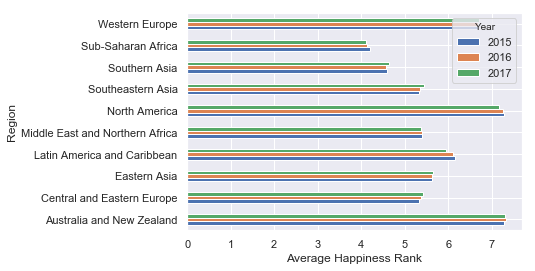

In [19]:
# hodnoty kontingenčnej tabuľky si môžeme priamo graficky zobraziť napr. ako horizontálny stĺpcový graf
table.plot(kind="barh")
# nastavíme popis x-ovej osy
l = plt.xlabel("Average Happiness Rank")

In [20]:
# v jednej tabuľke môžete vypočítať viacero agregačných funkcií nastavením parametra aggfunc na zoznam funkcií,
# napr. pre výpočet priemernej hodnoty a štandardnej odchýlky skóre pre každý región:
pd.pivot_table(data, index="Region", values="Score", aggfunc=["mean", "std"])

,mean,std
,Score,Score
Region,,
Australia and New Zealand,7.302515,0.021036
Central and Eastern Europe,5.371189,0.578285
Eastern Asia,5.632376,0.502141
Latin America and Caribbean,6.069061,0.728171
Middle East and Northern Africa,5.387903,1.031671
North America,7.227118,0.179381
Southeastern Asia,5.364044,0.882586
Southern Asia,4.590876,0.535979


In [21]:
# môžete naraz vypočítať aj rôzne agregačné funkcie pre rôzne číselné atribúty
# napr. v nasledujúcej tabuľke vypočítame priemernú hodnotu pre skóre (Score) a minimálnu a maximálnu hodnotu
# pre poradie (Rank) pre každý región
pd.pivot_table(data, index="Region", values=["Score", "Rank"], aggfunc={"Score": "mean", "Rank": ["min", "max"]})

Rank         Score
                                 max min      mean
Region                                            
Australia and New Zealand         10   8  7.302515
Central and Eastern Europe       134  23  5.371189
Eastern Asia                     101  33  5.632376
Latin America and Caribbean      145  12  6.069061
Middle East and Northern Africa  156  11  5.387903
North America                     15   5  7.227118
Southeastern Asia                145  22  5.364044
Southern Asia                    154  79  4.590876
Sub-Saharan Africa               158  64  4.150938
Western Europe                   102   1  6.693006

### Závislosti medzi číselnými atribútmi - korelácia

Základným typom závislosti medzi dvoma číselnými atribútmi je lineárna závislosť, ktorú je možné vyjadriť (_Pearsonovym_) korelačným koeficientom.

In [22]:
# vyberieme si iba číselné atribúty ukazovateľov
factors = data[["GDP", "Family", "Health", "Freedom", "Trust",  "Generosity"]]
# pomocou metódy corr vypočítame korelačnú tabuľku
corr_table = factors.corr()
corr_table

,GDP,Family,Health,Freedom,Trust,Generosity
GDP,1.000000,0.585449,0.792224,0.344962,0.301935,-0.014173
Family,0.585449,1.000000,0.486383,0.425377,0.158605,0.071775
Health,0.792224,0.486383,1.000000,0.359566,0.262932,0.077326
Freedom,0.344962,0.425377,0.359566,1.000000,0.490405,0.343389
Trust,0.301935,0.158605,0.262932,0.490405,1.000000,0.287414
Generosity,-0.014173,0.071775,0.077326,0.343389,0.287414,1.000000


Hodnoty si môžeme graficky zobraziť pomocou grafu typu _teplotnej mapy_ (_heat map_).

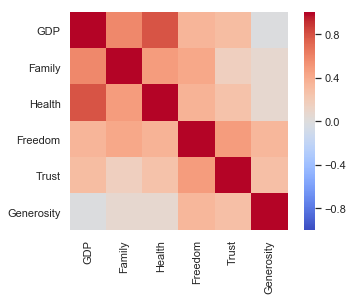

In [23]:
p = sns.heatmap(corr_table,
                xticklabels=corr_table.columns, yticklabels=corr_table.columns, # označíme osy názvami stĺpcov
                vmin=-1, vmax=1, # nastavíme minimálnu a maximálnu hodnotu pre farebnú paletu
                cmap='coolwarm', # zmeníme prednastavenú paletu farieb 
                square=True)     # zobrazia sa štvorcové polia

Najväčšia závislosť je medzi atribútmi `GDP` a `Health`. Dáta si zobrazíme na X-Y grafe do ktorého zobrazíme aj regresnú priamku.

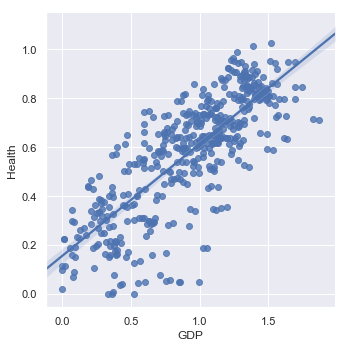

In [36]:
p = sns.lmplot(data=factors, x='GDP', y='Health', fit_reg=True) 

Závislosť medzi všetkými číselnými atribútmi naraz si môžete prehľadne zobraziť grafom typu _pair plot_.

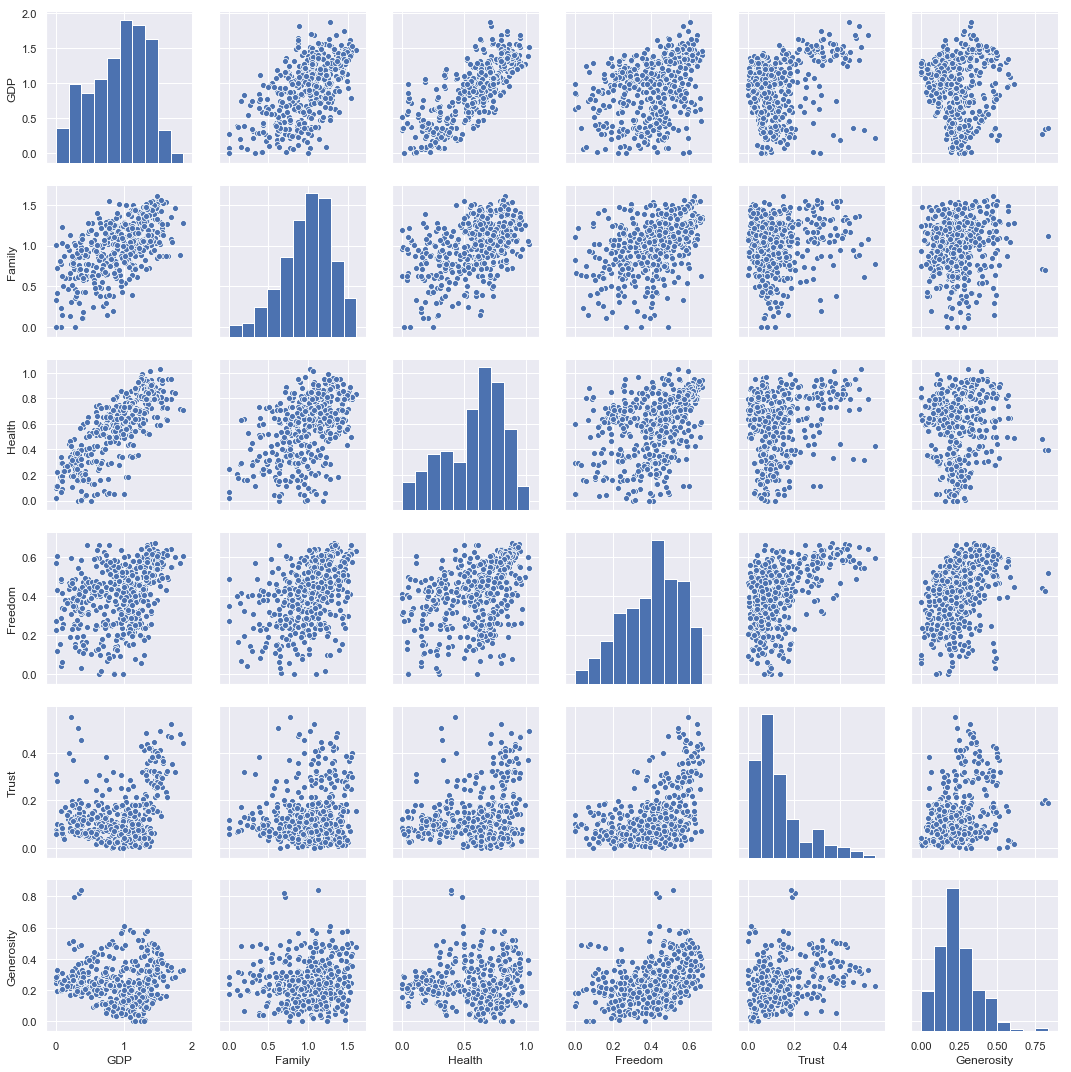

In [24]:
p = sns.pairplot(factors)

## Dátová množina - Iris

Dátová množina **Iris** popisuje kvety kosatcov druhu Iris setosa, Iris virginica a Iris versicolor.
Množinu zozbieral biológ Edgar Anderson a prvý krát ju použil pri dátovej analýze britský štatistik
[Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) v roku 1936. Množina obsahuje 50 príkladov z každého druhu, ktoré sú popísané 4 atribútmi:
dĺžkou a šírkou okvetných listov (`petal_width`, `petal_height`) a dĺžkov a šírkov listov kalicha (`sepal_width`, `sepal_height`).

![Iris versicolor](iris.jpg)
[Zdroj](https://en.wikipedia.org/wiki/Iris_versicolor)

### Úloha 7.2

1. Načítajte dáta z dátovej množiny Iris (súbor `../data/iris.csv`) do premennej `iris`.
2. Vypočítajte základné štatistiky pre číselné atribúty.
3. Pre nominálny atribút `species` zobrazte rôzne hodnoty a ich početnosti.
4. Zistite, či dátová množina obsahuje chýbajúce hodnoty.

In [26]:
iris = pd.read_csv("../data/iris.csv")
iris["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [27]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Úloha 7.3

Zobrazte graf _pair plot_ pre číselné atribúty. Viete z priebehu určiť, ktoré atribúty sú najviac korelované?

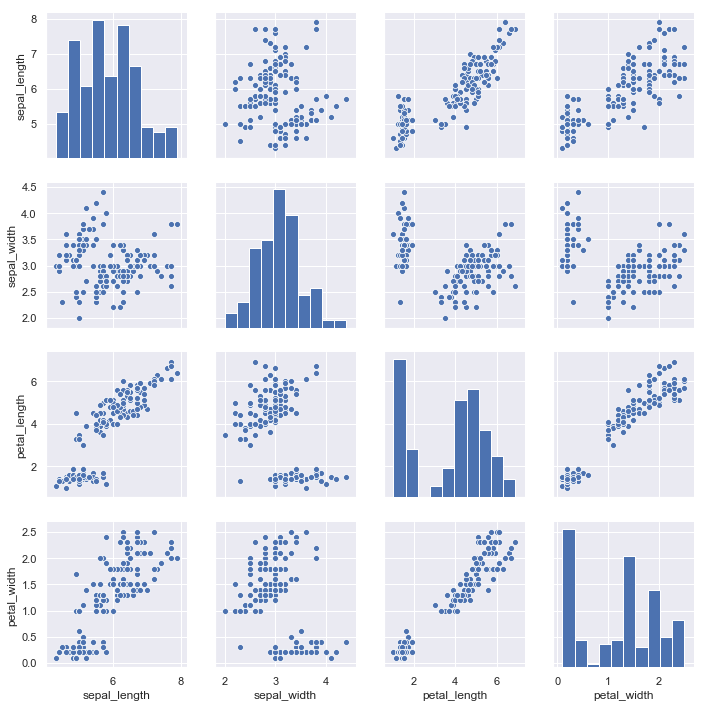

In [28]:
pp = sns.pairplot(iris)
#petal_length a petal_width sú najvia korelované

### Úloha 7.4

Vypočítajte korelačnú maticu a zobrazte ju pomocou teplotnej mapy. Určite, ktoré dva atribúty sú najviac a najmenej korelované a zobrazte ich X-Y priebeh spolu s regresnou priamkou.

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


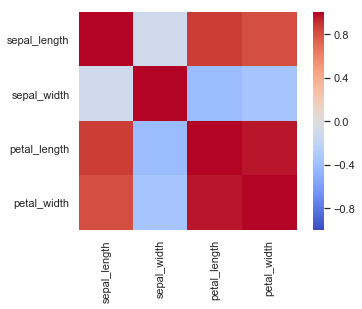

In [29]:
i_corr_table = iris.corr()
print(i_corr_table)
pp = sns.heatmap (i_corr_table, xticklabels=i_corr_table.columns, yticklabels=i_corr_table.columns,
                  vmin=-1, vmax=1,
                  cmap='coolwarm',
                  square=True)
                

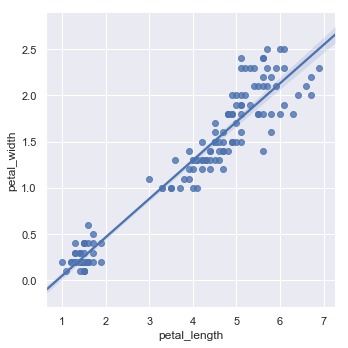

In [33]:
pp = sns.lmplot(data=iris, x='petal_length', y='petal_width', fit_reg=True) 

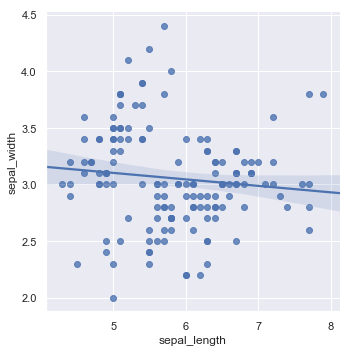

In [25]:
pp = sns.lmplot(data=iris, x='sepal_length', y='sepal_width', fit_reg=True) #najmenej korelované atribúty

### Úloha 7.5

Pomocou kontingenčnej tabuľky vypočítajte priemernú hodnotu a štandardnú odchýlku pre atribúty `sepal_length` a `sepal_width` zoskupené podľa atribútu `species.

In [34]:
pd.pivot_table(iris, index="species", values=["sepal_length","sepal_width"], aggfunc=["mean","std"])

mean                      std            
           sepal_length sepal_width sepal_length sepal_width
species                                                     
setosa            5.006       3.418     0.352490    0.381024
versicolor        5.936       2.770     0.516171    0.313798
virginica         6.588       2.974     0.635880    0.322497

### Úloha 7.6

1. Odfiltrujte z dátovej množiny iba riadky (príklady) patriace do triedy `virginica`.
2. Z odfiltrovaných riadkov vytvorte tabuľku s atribútmi `sepal_ratio = sepal_length / sepal_width` a `petal_ratio = petal_length / petal_width`.
3. Zobrazte X-Y závislosť medzi `sepal_ratio` a `petal_ratio` a vypočítajte korelačný koeficient medzi nimi.

In [39]:
#s = "virginica"
#i_selected.query("species == @s").copy()
virginica = iris.query("species == 'virginica'")

virginica_data = pd.DataFrame() 
virginica_data["sepal_ratio"] = virginica.eval("sepal_length / sepal_width")
virginica_data["petal_ratio"] = virginica.eval("petal_length / petal_width")

virginica_data.head()


,sepal_ratio,petal_ratio
100,1.909091,2.400000
101,2.148148,2.684211
102,2.366667,2.809524
103,2.172414,3.111111
104,2.166667,2.636364


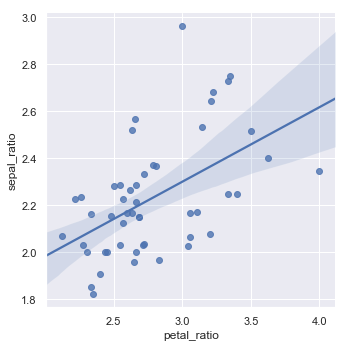

In [41]:
ratio_factors = virginica_data[["sepal_ratio", "petal_ratio"]]
tab = sns.lmplot(data=ratio_factors, x='petal_ratio', y='sepal_ratio', fit_reg=True)